<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

---

Notebook 1: Data Collection and Export<br>
**Notebook 2: Cleaning, Preprocessing and EDA**<br>
Notebook 3: Model Selection
---

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import warnings
#warnings.filterwarnings("ignore")

In [2]:
# Importing datasets from Notebook 1
ps5_full = pd.read_csv('../datasets/ps5_full.csv', dtype='str')
xbox_full = pd.read_csv('../datasets/xbox_full.csv', dtype='str')

---
## 1. Data Cleaning

### 1.1 PS5 Dataset

In [3]:
# Keeping just the 2 main columns
ps5 = ps5_full[['subreddit','title']]
print(ps5.shape)
ps5.head()

(14986, 2)


,subreddit,title
0,PS5,How did yall get your ps5s?
1,PS5,PS5 Horizon Bundle still in stock on PS Direct
2,PS5,Ps5 doesn’t work
3,PS5,VRR support for HDMI 1.4...
4,PS5,Slow download speeds?


In [4]:
# Checking for null values
ps5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986 entries, 0 to 14985
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  14986 non-null  object
 1   title      14986 non-null  object
dtypes: object(2)
memory usage: 234.3+ KB


### 1.2 Xbox Dataset

In [5]:
# Keeping just the 2 main columns
xbox = xbox_full[['subreddit','title']]
print(xbox.shape)
xbox.head()

(14996, 2)


,subreddit,title
0,XboxSeriesX,anyone know how to fix this?
1,XboxSeriesX,Resident Evil Disc
2,XboxSeriesX,Xbox has released a teaser for their fictional...
3,XboxSeriesX,!!!
4,XboxSeriesX,I'm finally getting a 4k TV what do I install?


In [6]:
# Checking for null values
xbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14996 entries, 0 to 14995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  14996 non-null  object
 1   title      14996 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


---
## 2. Preliminary EDA

### 2.1 Title Length

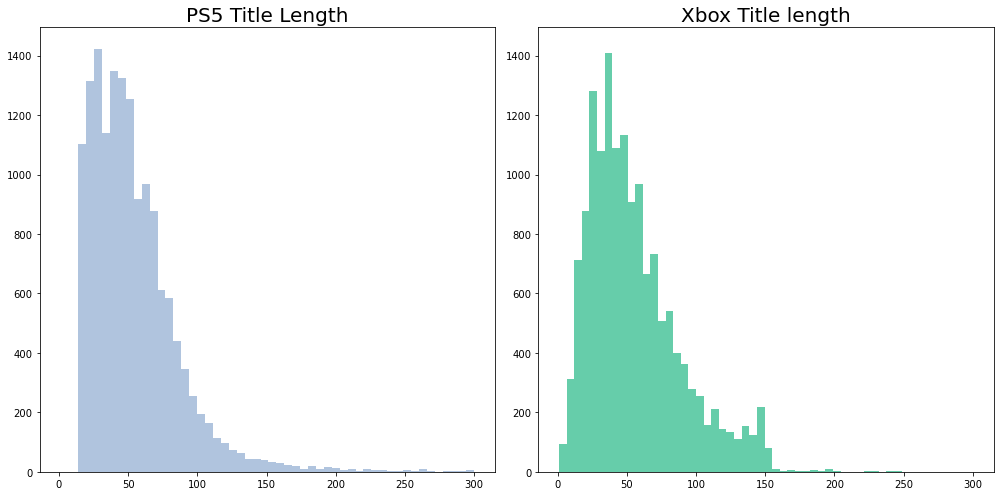

In [7]:
# Establish figure size.
plt.figure(figsize = (14,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PS5 Title Length', fontsize = 20)
ax1.hist(ps5['title'].str.len(), bins=50, color='lightsteelblue');

ax2 = plt.subplot(1, 2, 2, sharex = ax1, sharey = ax1)
ax2.set_title('Xbox Title length', fontsize = 20)
ax2.hist(xbox['title'].str.len(), bins=50, color='mediumaquamarine');

plt.tight_layout()

From the histograms, we can see that most titles contain 150 characters and below. We will plot a boxplot to explore this further. The PS5 title length graph doesn't start from 0 as there is a minimum character count required during post creation.

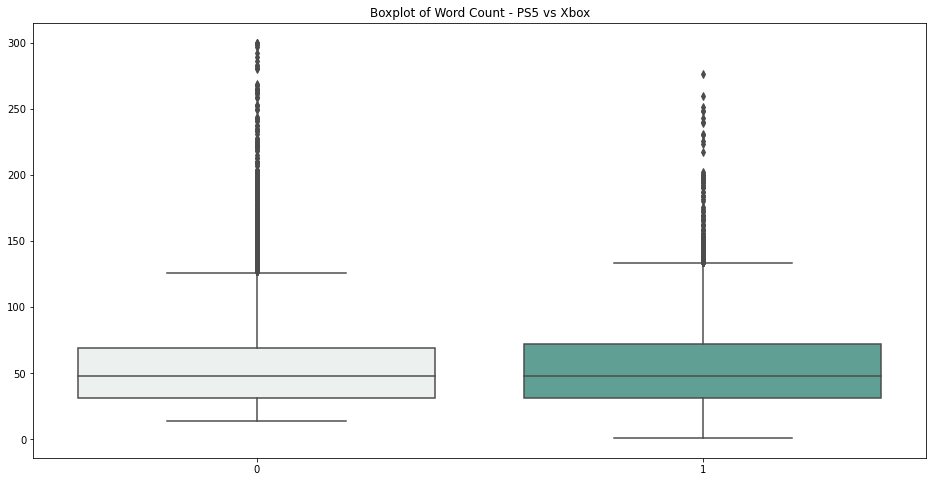

In [8]:
# Boxplot of both datasets
plt.figure(figsize = (16,8))
data = [ps5['title'].str.len(),xbox['title'].str.len()]
sns.boxplot(data=data, palette="light:#5A9").set(title='Boxplot of Word Count - PS5 vs Xbox');

Ftom the above plots, we can conclude that are no obvious outliers that need to be removed.

### 2.2 Top Unigrams

#### 2.2.1 PS5

In [9]:
# Instantiate CountVectorizer
cvec = CountVectorizer(stop_words = 'english',ngram_range=(1,1))

# Fitting and transforming
ps5_cvec = cvec.fit_transform(ps5['title'])

# Converting results into a dataFrame
ps5_unigram = pd.DataFrame(ps5_cvec.toarray(),columns=cvec.get_feature_names_out())

# Identifying top 15 occurring unigrams
ps5_top_unigram = ps5_unigram.sum().sort_values(ascending=False).head(15)

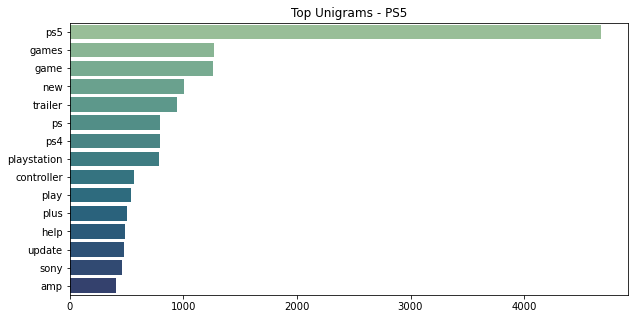

In [10]:
# Plotting barplot to visualize results
plt.figure(figsize = (10,5))
sns.barplot(x=ps5_top_unigram.values, y=ps5_top_unigram.index, palette='crest').set(title='Top Unigrams - PS5');

#### 2.2.2 Xbox

In [11]:
# Repeating above steps for Xbox dataset
cvec = CountVectorizer(stop_words = 'english',ngram_range=(1,1))
xbox_cvec = cvec.fit_transform(xbox['title'])
xbox_unigram = pd.DataFrame(xbox_cvec.toarray(),columns=cvec.get_feature_names_out())
xbox_top_unigram = xbox_unigram.sum().sort_values(ascending=False).head(15)

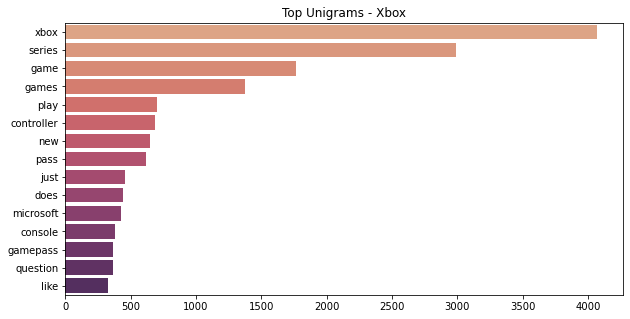

In [12]:
# Plotting barplot to visualize results
plt.figure(figsize = (10,5))
sns.barplot(x=xbox_top_unigram.values, y=xbox_top_unigram.index, palette='flare').set(title='Top Unigrams - Xbox');

The top occurring unigrams for both datasets contain some common words like `game`, `games`, `controller` and `play`. Other top unigrams include the company name, console name and subscription service.

### 2.3 Top Bigrams

#### 2.3.1 PS5

In [13]:
# Instantiate CountVectorizer 
cvec = CountVectorizer(stop_words = 'english',ngram_range=(2,2))

# Fitting and transforming
ps5_cvec = cvec.fit_transform(ps5['title'])

# Converting results into a dataFrame
ps5_bigram = pd.DataFrame(ps5_cvec.toarray(),columns=cvec.get_feature_names_out())

# Identifying top 15 bigrams
ps5_top_bigram = ps5_bigram.sum().sort_values(ascending=False).head(15)

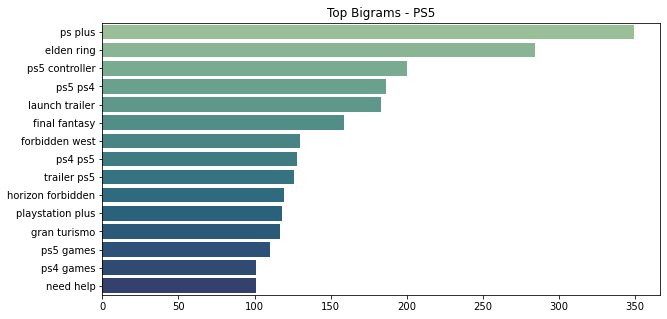

In [14]:
# Plotting barplot to visualize results
plt.figure(figsize = (10,5))
sns.barplot(x=ps5_top_bigram.values, y=ps5_top_bigram.index, palette='crest').set(title='Top Bigrams - PS5');

#### 2.3.2 Xbox

In [15]:
# Repeating steps for Xbox dataset
cvec = CountVectorizer(stop_words = 'english',ngram_range=(2,2))
xbox_cvec = cvec.fit_transform(xbox['title'])
xbox_bigram = pd.DataFrame(xbox_cvec.toarray(),columns=cvec.get_feature_names_out())
xbox_top_bigram = xbox_bigram.sum().sort_values(ascending=False).head(15)

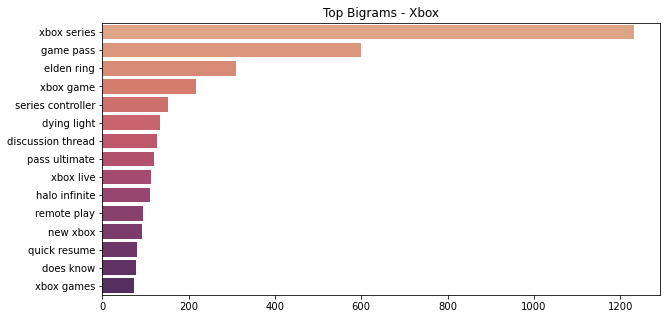

In [16]:
# Plotting barplot to visualize results
plt.figure(figsize = (10,5))
sns.barplot(x=xbox_top_bigram.values, y=xbox_top_bigram.index, palette='flare').set(title='Top Bigrams - Xbox');

The top bigrams are similar to the top unigrams, but also appear to give more specific information on the most mentioned games of each console. It is worth noting that `Elden Ring` is the only game that appears in both bar plots, and is also the most mentioned game in both subreddits.

### 2.4 Distribution of `created_utc`

In [17]:
# Preparing data to plot
ps5_created = ps5_full[['subreddit','created_utc']]
xbox_created = xbox_full[['subreddit','created_utc']]
created = pd.concat([ps5_created, xbox_created],ignore_index=True)

In [18]:
# Converting dtype of `created_utc`
created = created.astype({'created_utc': int})

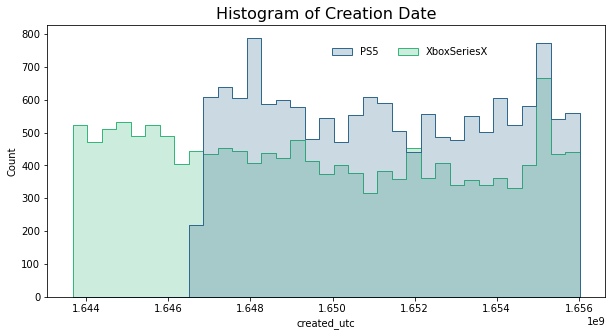

In [19]:
# Plotting Histogram
plt.figure(figsize = (10,5))
ax = sns.histplot(data=created, x='created_utc', hue='subreddit', element='step', palette="viridis")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.65, 0.85), ncol=2, title=None, frameon=False,
);
plt.title('Histogram of Creation Date', fontsize = 16);

The approximately 15,000 posts from the Xbox dataset are spread throughout a longer time period than the PS5 dataset. This shows the number of posts created per day on the PS5 subreddit is generally higher than Xbox. (Roughly 20-40% on average)

---
## 3. Preprocessing

In [20]:
# Combining both datasets
combined = pd.concat([ps5, xbox])
combined.shape

(29982, 2)

In [21]:
# Converting all letters into lowercase
combined['subreddit'] = combined['subreddit'].str.lower()
combined['title'] = combined['title'].str.lower()

### 3.1 Removing Symbols and Tokenizing

In [22]:
# Removing symbols from 'title' column
combined['title'] = combined['title'].str.lower().replace(r'[^a-z\s]|_', '', regex=True)

In [23]:
# Tokenizing 'title' column
combined["title_token"] = combined["title"].apply(word_tokenize)
combined = combined.drop('title', axis=1)

print(combined.shape)
combined.head()

(29982, 2)


,subreddit,title_token
0,ps5,"[how, did, yall, get, your, pss]"
1,ps5,"[ps, horizon, bundle, still, in, stock, on, ps..."
2,ps5,"[ps, doesnt, work]"
3,ps5,"[vrr, support, for, hdmi]"
4,ps5,"[slow, download, speeds]"


### 3.2 Lemmatizing and Removing Stop Words

In [24]:
# Creating a function to lemmatize and remove stop words
def preprocess(title_token):
    
    # Split and lemmatize words
    lemmatizer = WordNetLemmatizer()
    title_token = [lemmatizer.lemmatize(i) for i in title_token]
     
    # Remove stop words
    stop_words = stopwords.words('english')
    #extra_words = ['ps4', 'ps5', 'ps5s', 'pss', 'playstation', 'xbox', 'series x', 'series', 'series s', 'https']
    #stop_words.extend(extra_words)
    final = [u for u in title_token if u not in stop_words]

    # Combining all words 
    return (' '.join(final))

Lemmatization provides better results by performing an analysis that depends on the word's part-of-speech and producing real, dictionary words.

In [25]:
# Implementing function and droppping 'title_token' column
combined['title_final'] = combined['title_token'].map(preprocess)
combined = combined.drop('title_token', axis=1)
combined

,subreddit,title_final
0,ps5,yall get ps
1,ps5,p horizon bundle still stock p direct
2,ps5,p doesnt work
3,ps5,vrr support hdmi
4,ps5,slow download speed
...,...,...
14991,xboxseriesx,disc working
14992,xboxseriesx,im looking buying series x dont internet still...
14993,xboxseriesx,dog tipped series x im probably irreversibally...
14994,xboxseriesx,anyone xsx alienware awh


In [26]:
# Exporting combined dataset
combined.to_csv('../datasets/combined.csv', index=False)

### 3.3 Top Unigrams After Preprocessing

In [27]:
# Assigning X (feature matrix) and Y (response vector)
X = combined['title_final']

# Instantiate CountVectorizer
cvec = CountVectorizer()

# Fitting and transforming
X_cvec = cvec.fit_transform(X)

# Converting results into a dataFrame
X_df = pd.DataFrame(X_cvec.toarray(),columns=cvec.get_feature_names_out())

In [28]:
# Identifying top occurring words
X_df = X_df.sum().sort_values(ascending=False).head(20)

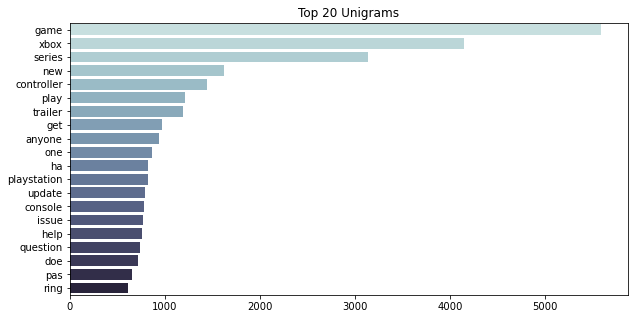

In [33]:
# Plotting barplot to visualize results
plt.figure(figsize = (10,5))
sns.barplot(x=X_df.values, y=X_df.index, palette="ch:start=.2,rot=-.3").set(title='Top 20 Unigrams');

Common words between both datasets like `game`, `controller` and `play` are amplified after the merge.

---